IMPORTAÇÃO DE BIBLIOTECAS E DADOS

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point
from geopy.geocoders import Nominatim
from shapely.geometry import Point
import contextily as ctx
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

file_name = "FIEE_LEADS.xlsx"

df = pd.read_excel(file_name)

counts_scans = df["Escaneado por"].value_counts()
counts_cidades = df["Cidade"].value_counts()
counts_estados = df["Estado"].value_counts()

TRATAMENTO, LIMPEZA DOS DADOS, CONVERSÃO DE COLUNA DATA/HORA E CONFERÊNCIA

In [2]:
# Mapear nomes completos dos meses para abreviados em português
meses = {
    'janeiro': 'Jan', 'fevereiro': 'Fev', 'março': 'Mar', 'abril': 'Abr',
    'maio': 'Mai', 'junho': 'Jun', 'julho': 'Jul', 'agosto': 'Ago',
    'setembro': 'Set', 'outubro': 'Out', 'novembro': 'Nov', 'dezembro': 'Dez'
}

df['Data'] = pd.to_datetime(df['Data'].str.replace(r"\b(" + "|".join(meses.keys()) + r")\b", lambda x: meses[x.group(0)], regex=True))

df['Dia'] = df['Data'].dt.date
df['Hora'] = df['Data'].dt.time

print(df[['Data', 'Dia', 'Hora']])

                   Data         Dia      Hora
0   2023-07-18 13:42:00  2023-07-18  13:42:00
1   2023-07-18 13:57:00  2023-07-18  13:57:00
2   2023-07-18 13:57:00  2023-07-18  13:57:00
3   2023-07-18 14:07:00  2023-07-18  14:07:00
4   2023-07-18 15:36:00  2023-07-18  15:36:00
..                  ...         ...       ...
369 2023-07-20 16:20:00  2023-07-20  16:20:00
370 2023-07-20 16:20:00  2023-07-20  16:20:00
371 2023-07-21 14:21:00  2023-07-21  14:21:00
372 2023-07-21 14:22:00  2023-07-21  14:22:00
373 2023-07-21 14:29:00  2023-07-21  14:29:00

[374 rows x 3 columns]


INÍCIO DO ESTUDO

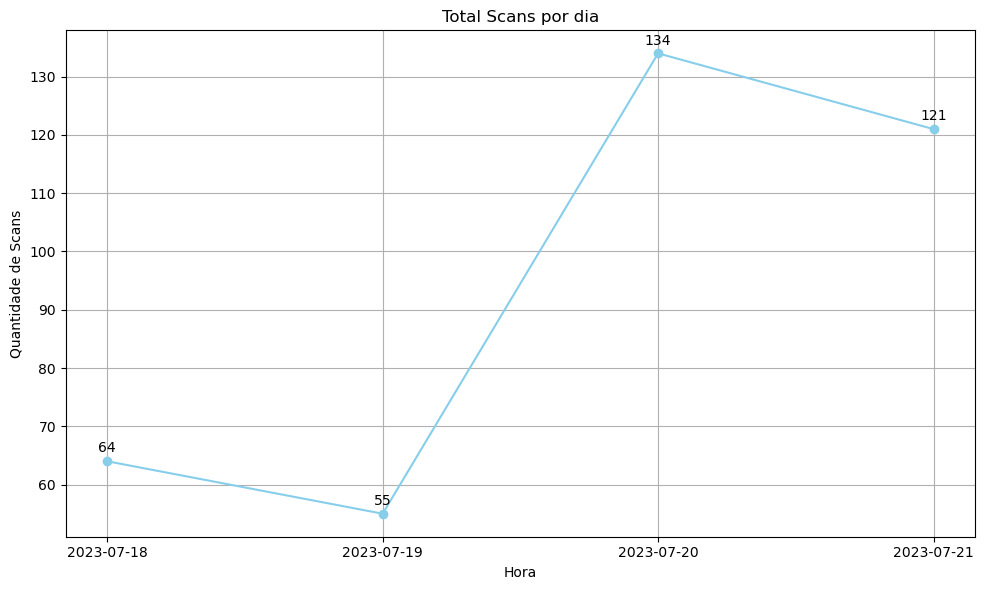

In [3]:
counts_dias = df['Dia'].value_counts()

counts_dias = counts_dias.sort_index()

plt.figure(figsize=(10, 6))
line_plot = plt.plot(counts_dias.index, counts_dias.values, marker='o', color='skyblue')
plt.xlabel("Hora")
plt.ylabel("Quantidade de Scans")
plt.title("Total Scans por dia")
plt.xticks(counts_dias.index)
plt.grid(True)

for x, y in zip(counts_dias.index, counts_dias.values):
    plt.text(x, y + 1, str(y), ha='center', va='bottom')

plt.tight_layout()
plt.show()

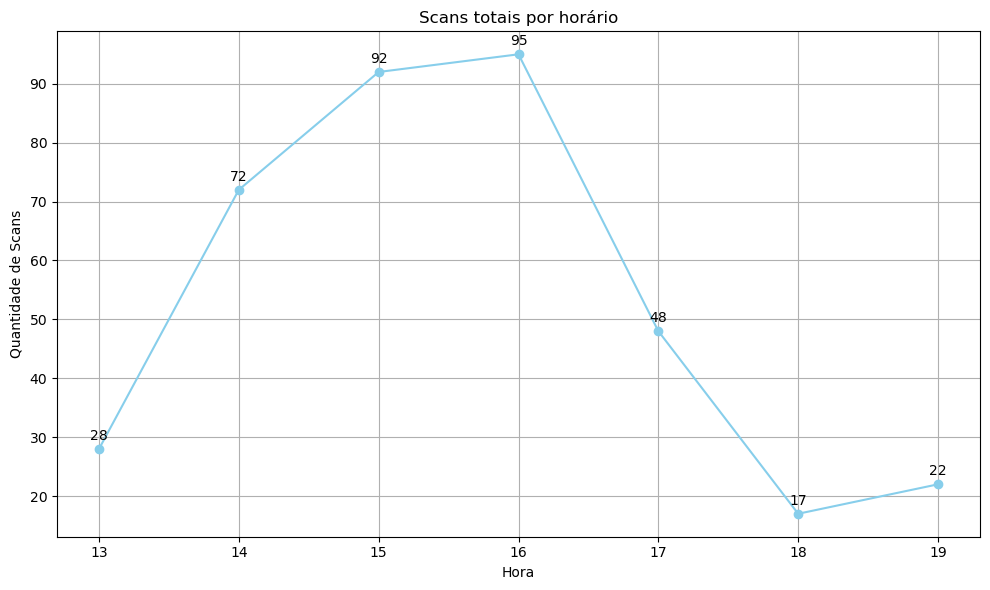

In [4]:
meses = {
    'janeiro': 'Jan', 'fevereiro': 'Fev', 'março': 'Mar', 'abril': 'Abr',
    'maio': 'Mai', 'junho': 'Jun', 'julho': 'Jul', 'agosto': 'Ago',
    'setembro': 'Set', 'outubro': 'Out', 'novembro': 'Nov', 'dezembro': 'Dez'
}

df['Dia'] = df['Data'].dt.date
df['Hora'] = df['Data'].dt.hour

counts_horarios = df['Hora'].value_counts()

counts_horarios = counts_horarios.sort_index()

plt.figure(figsize=(10, 6))
line_plot = plt.plot(counts_horarios.index, counts_horarios.values, marker='o', color='skyblue')
plt.xlabel("Hora")
plt.ylabel("Quantidade de Scans")
plt.title("Scans totais por horário")
plt.xticks(counts_horarios.index)
plt.grid(True)

for x, y in zip(counts_horarios.index, counts_horarios.values):
    plt.text(x, y + 1, str(y), ha='center', va='bottom')

plt.tight_layout()
plt.show()

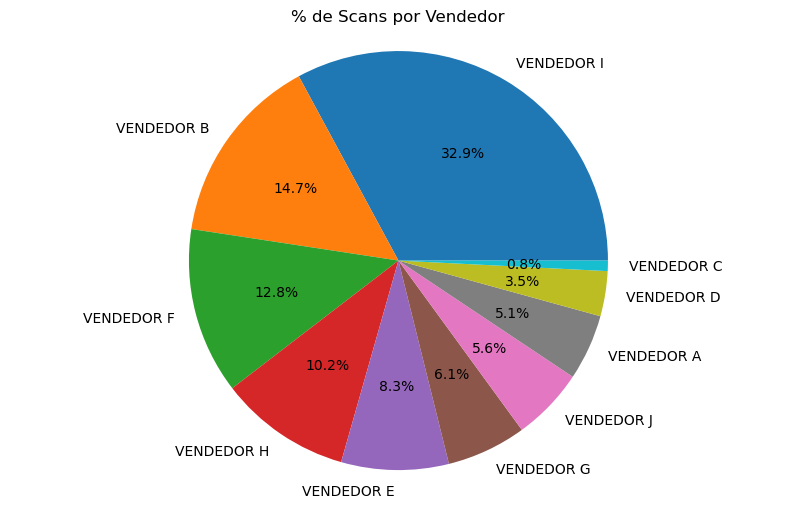

In [5]:
plt.figure(figsize=(10, 6))
plt.pie(counts_scans, labels=counts_scans.index, autopct='%1.1f%%')
plt.title("% de Scans por Vendedor")
plt.axis('equal')  
plt.show()

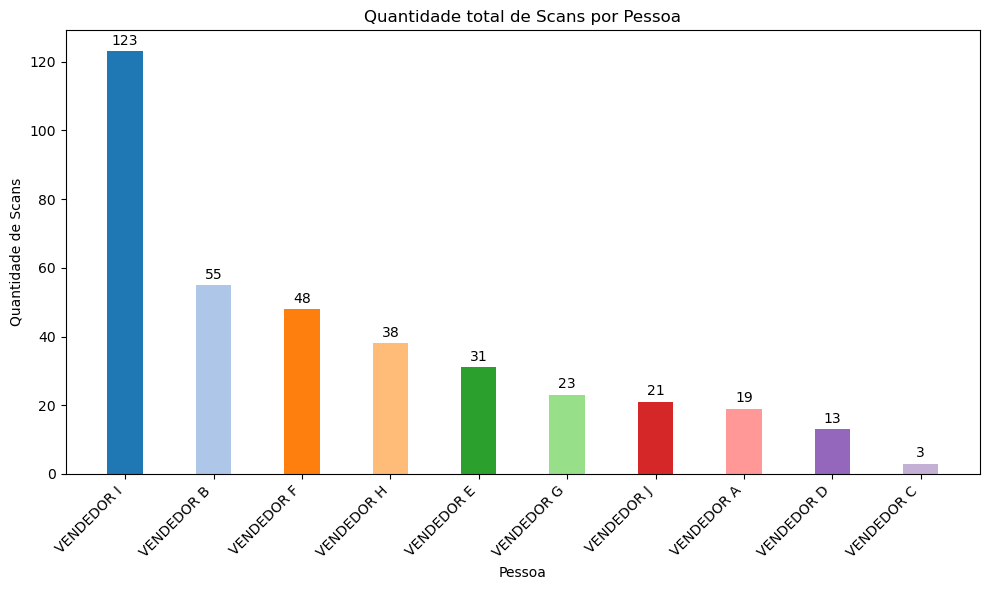

In [6]:
plt.figure(figsize=(10, 6))
bar_width = 0.4  # Largura das barras
index = range(len(counts_scans))
colors = plt.cm.tab20.colors[:len(counts_scans)]

plt.bar(index, counts_scans, width=bar_width, color=colors)

for idx, value in enumerate(counts_scans):
    plt.text(idx, value + 1, str(value), ha='center', va='bottom')

plt.xlabel("Pessoa")
plt.ylabel("Quantidade de Scans")
plt.title("Quantidade total de Scans por Pessoa")
plt.xticks(index, counts_scans.index, rotation=45, ha='right')
plt.tight_layout()
plt.show()

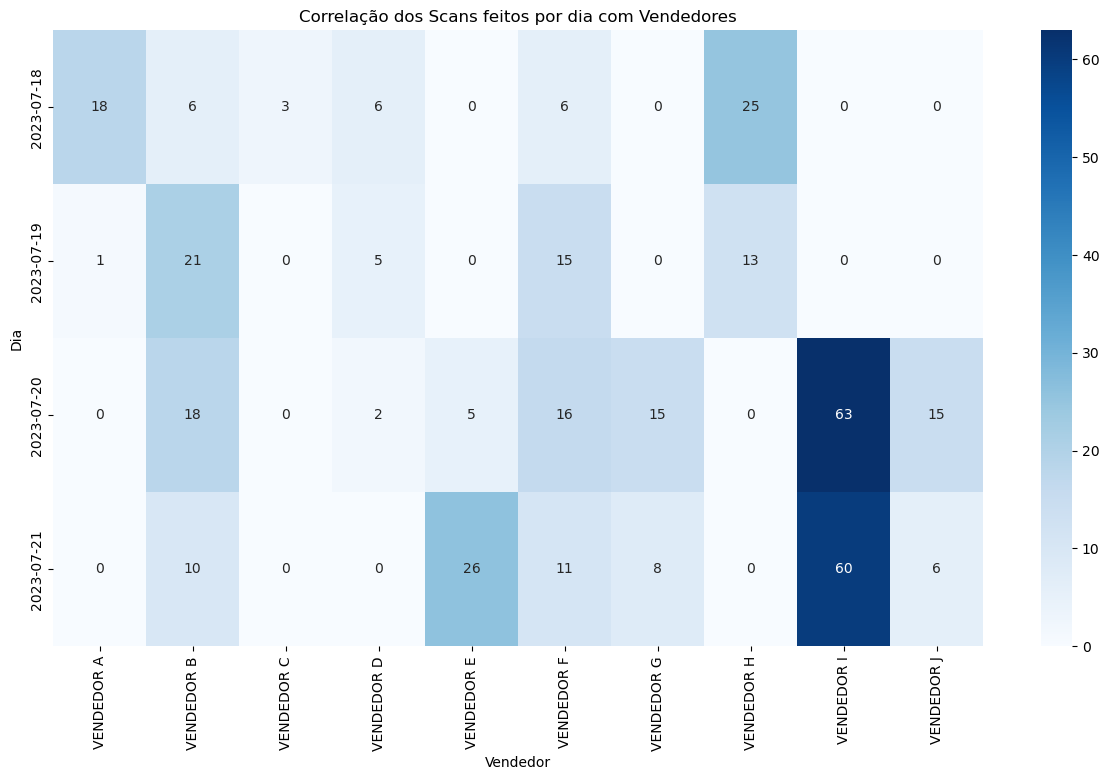

In [7]:
colunas_relevantes = df['Escaneado por'].unique()
df_relevante = df[df['Escaneado por'].isin(colunas_relevantes)]

df_one_hot = pd.get_dummies(df_relevante, columns=['Escaneado por'], prefix='', prefix_sep='')

colunas_pivot = [coluna for coluna in df_one_hot.columns if coluna != 'Dia' and coluna != 'Hora']

pivot_table = df_one_hot.pivot_table(index='Dia', values=colunas_pivot, aggfunc='sum')

plt.figure(figsize=(15, 8))
sns.heatmap(pivot_table, cmap='Blues', annot=True, fmt='.0f')  # Usei '.0f' para números inteiros
plt.xlabel("Vendedor")
plt.ylabel("Dia")
plt.title("Correlação dos Scans feitos por dia com Vendedores")
plt.show()

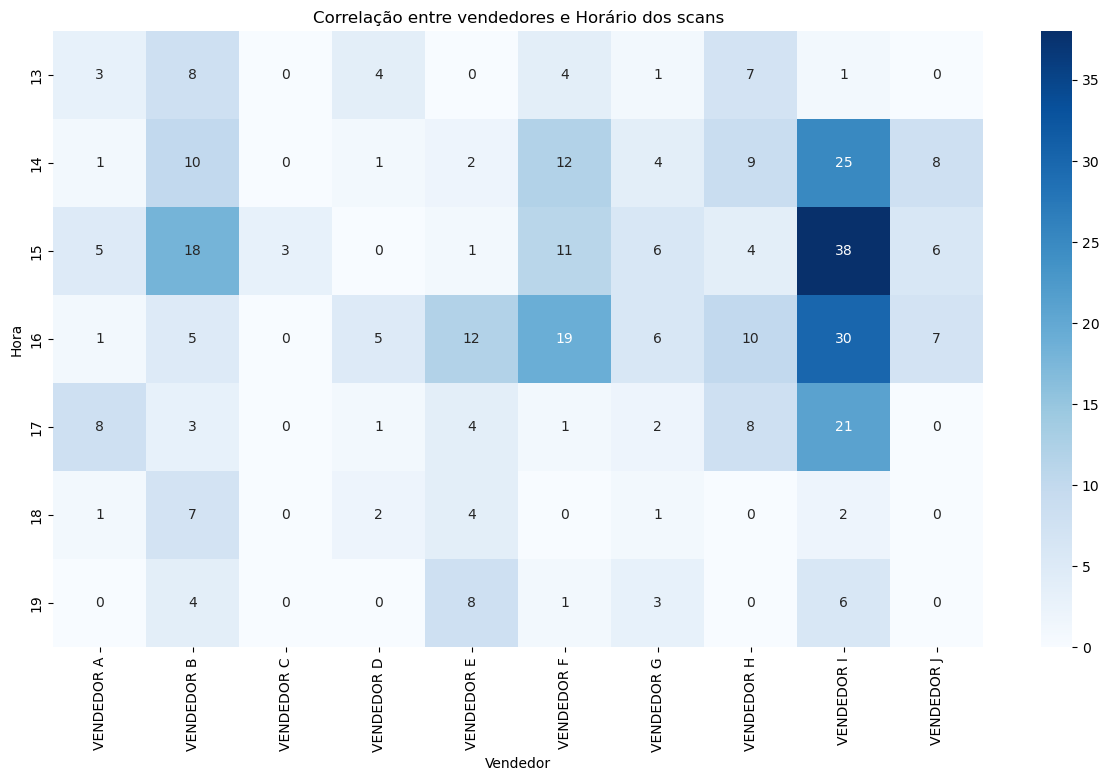

In [8]:
colunas_relevantes = df['Escaneado por'].unique()
df_relevante = df[df['Escaneado por'].isin(colunas_relevantes)]

df_one_hot = pd.get_dummies(df_relevante, columns=['Escaneado por'], prefix='', prefix_sep='')

pivot_table = df_one_hot.pivot_table(index='Hora', aggfunc='sum')

plt.figure(figsize=(15, 8))
sns.heatmap(pivot_table, cmap='Blues', annot=True, fmt='.0f')  # Usei o '.0f' para números inteiros
plt.xlabel("Vendedor")
plt.ylabel("Hora")
plt.title("Correlação entre vendedores e Horário dos scans")
plt.show()

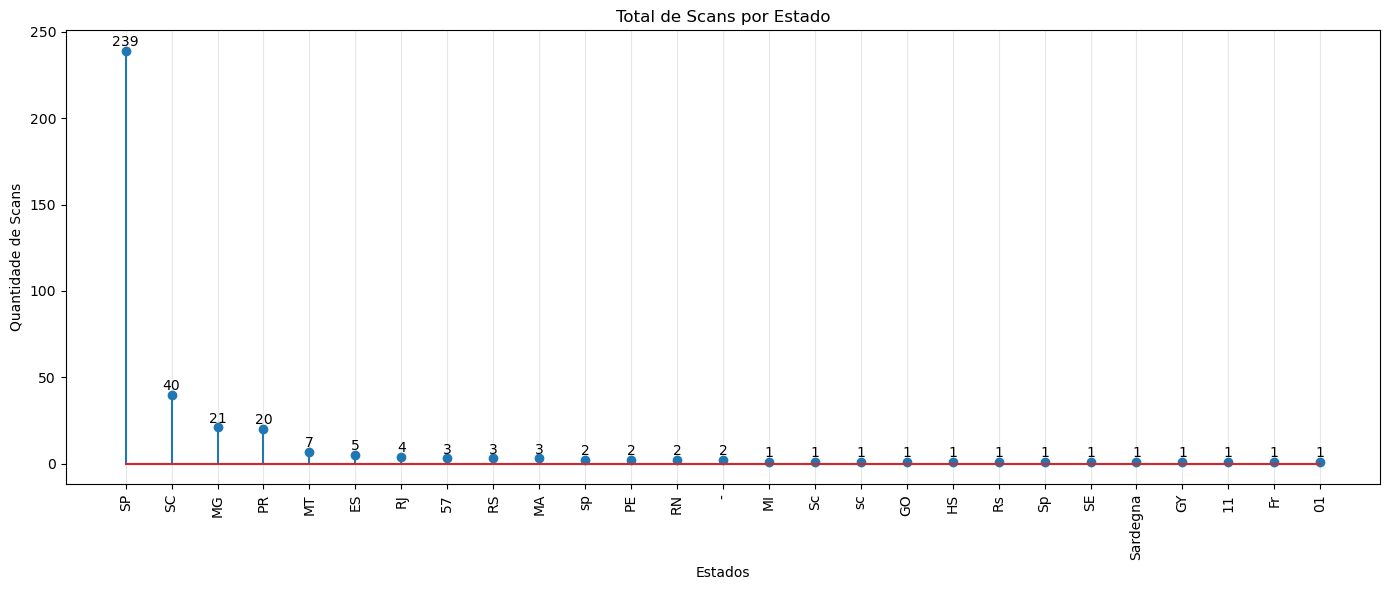

In [9]:
plt.figure(figsize=(14, 6))
stem_plot = plt.stem(counts_estados)

for index, value in enumerate(counts_estados):
    plt.text(index, value + 1, str(value), ha='center', va='bottom')

plt.xlabel("Estados")
plt.ylabel("Quantidade de Scans")
plt.title("Total de Scans por Estado")
plt.xticks(range(len(counts_estados)), counts_estados.index, rotation=90)
plt.grid(axis='x', linestyle='-', alpha=0.3)
plt.tight_layout()
plt.show()

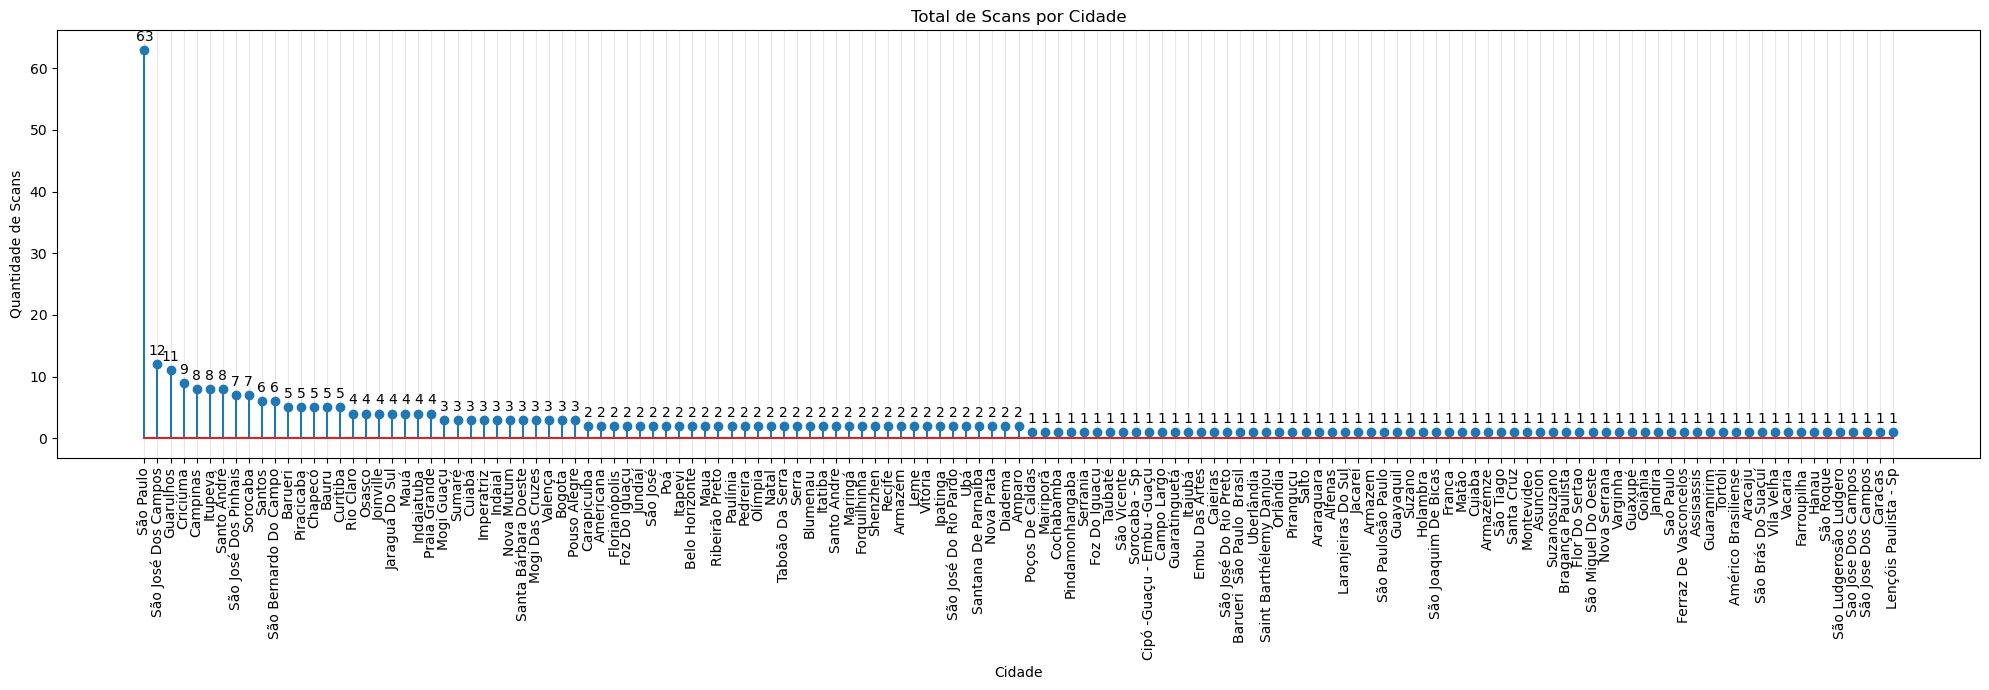

In [10]:
plt.figure(figsize=(20, 7))
stem_plot = plt.stem(counts_cidades)

for index, value in enumerate(counts_cidades):
    plt.text(index, value + 1, str(value), ha='center', va='bottom')

plt.xlabel("Cidade")
plt.ylabel("Quantidade de Scans")
plt.title("Total de Scans por Cidade")
plt.xticks(range(len(counts_cidades)), counts_cidades.index, rotation=90)
plt.grid(axis='x', linestyle='-', alpha=0.3)
plt.tight_layout()
plt.show()

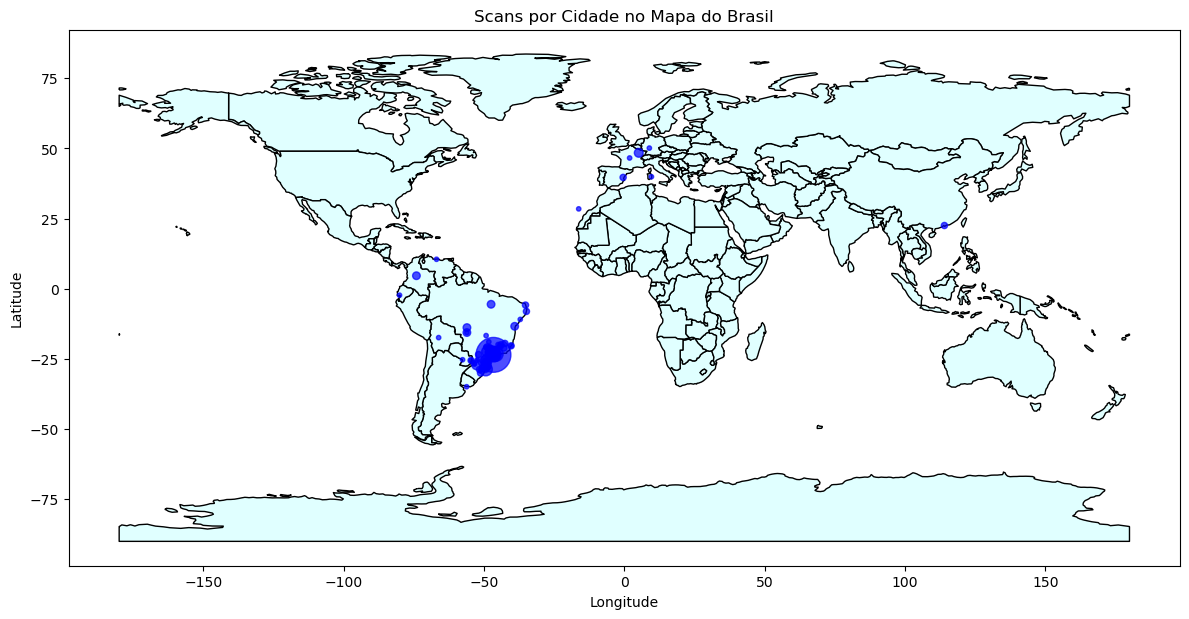

In [11]:
data = {'Cidades': counts_cidades.index, 'Quantidade de Scans': counts_cidades.values}
df_cidades = pd.DataFrame(data)

geolocator = Nominatim(user_agent="geoapiExercises")
df_cidades['Coordinates'] = df_cidades['Cidades'].apply(geolocator.geocode).apply(lambda x: (x.latitude, x.longitude) if x else None)

df_cidades = df_cidades.dropna()

gdf_cidades = gpd.GeoDataFrame(df_cidades, geometry=gpd.points_from_xy(df_cidades['Coordinates'].apply(lambda x: x[1]), df_cidades['Coordinates'].apply(lambda x: x[0])))

brasil = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

fig, ax = plt.subplots(figsize=(12, 8))
brasil.plot(ax=ax, color='lightcyan', edgecolor='black')
gdf_cidades.plot(ax=ax, color='blue', markersize=df_cidades['Quantidade de Scans']*10, alpha=0.7) 
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Scans por Cidade no Mapa do Brasil")
plt.tight_layout()
plt.show()